# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

- We've made minor changes on the data to fit this exercise, such as changing the column names. Check out the original source if you are interested in using this data for other purposes (https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [1]:
import pandas as pd

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [2]:
account = pd.read_csv('account.csv')
district = pd.read_csv('district.csv')

In [3]:
trans = pd.read_csv('trans.csv.zip')

C:\Users\liann\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


If you want to remove the warning message, you can specify dtype for the column `partner_bank` as below. But it's not mandatory.

`trans = pd.read_csv('trans.csv.zip', dtype={'partner_bank': 'string'})`

### 3. Look at the info summary, head of each DataFrame

In [4]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [5]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [6]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [7]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN


In [8]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   object 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


In [9]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,NaN,NaN


A few key things to notice: 
- We must fix the data types for some columns
- There is missing data
- These datasets have connections among them:
  - `account` and `trans` have common column named `account_id`
  - `account` and `district` have common column named `district_id`

### 4. Check for the unique values and their counts in each column for the three DataFrames

In [10]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [11]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [12]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

All columns have at least 2 unique values

### 5. Check for duplicates in the three DataFrames

In [13]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [14]:
district[district.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [15]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


No duplicated rows in the DataFrames

### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [16]:
account['account_open_date'] = pd.to_datetime(account['account_open_date'])
trans['date'] = pd.to_datetime(trans['date'])

In [17]:
account.dtypes

account_id                    int64
district_id                   int64
frequency                    object
account_open_date    datetime64[ns]
client_id                     int64
dtype: object

In [18]:
trans.dtypes

trans_id                    int64
account_id                  int64
date               datetime64[ns]
type                       object
operation_type             object
amount                    float64
balance                   float64
description                object
partner_bank               object
partner_account           float64
dtype: object

### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [19]:
district['region'] = district['region'].str.upper()

In [20]:
district['district_name'] = district['district_name'].str.upper()

In [21]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,HL.M. PRAHA,PRAGUE,1204953,12541.0,0.43,99107.0
1,2,BENESOV,CENTRAL BOHEMIA,88884,NaN,NaN,2674.0
2,3,BEROUN,CENTRAL BOHEMIA,75232,8980.0,2.21,2813.0
3,4,KLADNO,CENTRAL BOHEMIA,149893,9753.0,5.05,NaN
4,5,KOLIN,CENTRAL BOHEMIA,95616,9307.0,4.43,NaN


### 8. Check for missing data by columns in `account` using the `isna` method

In [22]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

No missing data in this dataset

### 9. Check for missing data by columns in `district` using the `isna` method

In [23]:
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [25]:
cols_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']

##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [26]:
iter_imp = IterativeImputer(min_value=district[cols_to_impute].min(), max_value=district[cols_to_impute].max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [27]:
imputed_cols = iter_imp.fit_transform(district[cols_to_impute])

##### Assign the imputed array back to the original DataFrame's columns

In [28]:
district[cols_to_impute] = imputed_cols

##### Double check that the columns are imputed

In [29]:
district.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 10. Check for missing data by columns in `trans` using the `isna` method

In [30]:
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [31]:
numeric_cols = trans.select_dtypes(include='number').columns
cat_cols = trans.select_dtypes(exclude='number').columns

In [32]:
trans[numeric_cols] = trans[numeric_cols].fillna(-999)

In [33]:
trans[cat_cols] = trans[cat_cols].fillna('UNKNOWN')

In [34]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  datetime64[ns]
 3   type             1056320 non-null  object        
 4   operation_type   1056320 non-null  object        
 5   amount           1056320 non-null  float64       
 6   balance          1056320 non-null  float64       
 7   description      1056320 non-null  object        
 8   partner_bank     1056320 non-null  object        
 9   partner_account  1056320 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [35]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000000,7.600000e+01,76.000000,76.000000,76.000000
mean,38.500000,1.336920e+05,8983.707247,3.864003,5054.492038
std,22.083176,1.378127e+05,740.959314,1.721597,11392.279917
min,1.000000,4.282100e+04,8110.000000,0.430000,888.000000
25%,19.750000,8.472500e+04,8533.750000,2.650000,1918.454646
50%,38.500000,1.083910e+05,8792.984750,3.761936,2864.000000
75%,57.250000,1.382770e+05,9280.750000,4.570000,4562.413240
max,76.000000,1.204953e+06,12541.000000,9.400000,99107.000000


array([[<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'average_salary'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:title={'center':'num_committed_crimes'}>]],
      dtype=object)

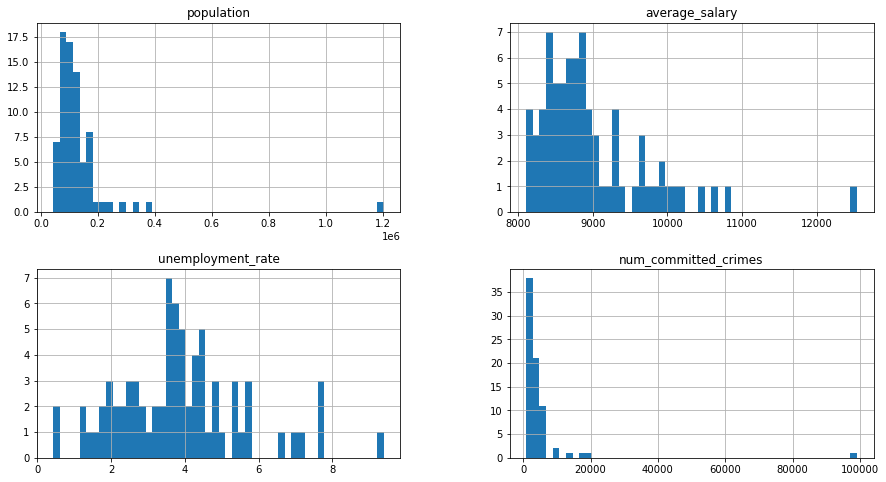

In [36]:
district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']].hist(bins=50, figsize=(15, 8))

#### Explore the outliers in the dataset

In [37]:
district.nlargest(1, columns='population')

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,HL.M. PRAHA,PRAGUE,1204953.0,12541.0,0.43,99107.0


The most obvious outlier seems to come from the same district. It is a district with large `population`, higher `average_salary`, as well as higher `num_committed_crimes`. Since we don't have enough reasons to remove it, we'll leave it.

### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

In [38]:
trans.describe()

,trans_id,account_id,amount,balance,partner_account
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06
mean,1.335311e+06,2.936867e+03,5.924146e+03,3.851833e+04,1.277068e+07
std,1.227487e+06,2.477345e+03,9.522735e+03,2.211787e+04,2.613658e+07
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.112570e+04,-9.990000e+02
25%,4.302628e+05,1.204000e+03,1.359000e+02,2.240250e+04,-9.990000e+02
50%,8.585065e+05,2.434000e+03,2.100000e+03,3.314340e+04,-9.990000e+02
75%,2.060979e+06,3.660000e+03,6.800000e+03,4.960362e+04,3.410566e+06
max,3.682987e+06,1.138200e+04,8.740000e+04,2.096370e+05,9.999420e+07


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'balance'}>]], dtype=object)

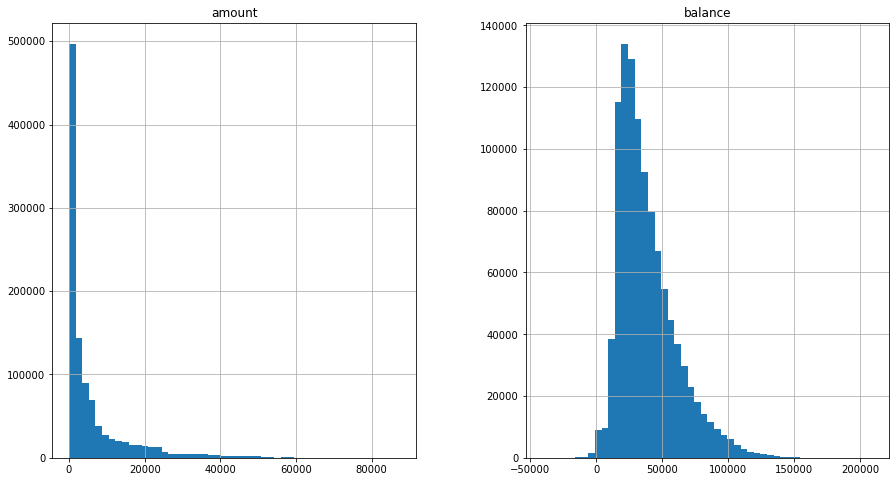

In [39]:
trans[['amount', 'balance']].hist(bins=50, figsize=(15,8))

#### Explore the outliers in the dataset

In [40]:
trans[trans['amount'] > 60000]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
422,1313408,4484,1993-02-23,DEBIT,WITHDRAWAL IN CASH,62100.0,41183.0,UNKNOWN,UNKNOWN,-999.0
1287,1450519,4937,1993-04-04,DEBIT,WITHDRAWAL IN CASH,60500.0,74071.2,UNKNOWN,UNKNOWN,-999.0
3565,303136,1032,1993-06-05,CREDIT,COLLECTION FROM ANOTHER BANK,74648.0,112843.8,UNKNOWN,GH,43027007.0
3635,655858,2242,1993-06-06,CREDIT,COLLECTION FROM ANOTHER BANK,65240.0,126832.2,UNKNOWN,CD,7862908.0
3783,894506,3050,1993-06-08,CREDIT,COLLECTION FROM ANOTHER BANK,62168.0,73568.0,UNKNOWN,GH,69871258.0
...,...,...,...,...,...,...,...,...,...,...
1049226,602639,2051,1998-12-21,DEBIT,WITHDRAWAL IN CASH,62000.0,71187.7,UNKNOWN,UNKNOWN,-999.0
1049504,302367,1029,1998-12-22,DEBIT,WITHDRAWAL IN CASH,63800.0,57501.1,UNKNOWN,UNKNOWN,-999.0
1049791,335369,1139,1998-12-23,DEBIT,WITHDRAWAL IN CASH,62600.0,90537.9,UNKNOWN,UNKNOWN,-999.0
1050834,414144,1407,1998-12-26,DEBIT,WITHDRAWAL IN CASH,62700.0,73836.1,UNKNOWN,UNKNOWN,-999.0


In [41]:
trans.loc[trans['amount'] > 60000, 'operation_type'].value_counts()

WITHDRAWAL IN CASH              837
COLLECTION FROM ANOTHER BANK    738
Name: operation_type, dtype: int64

In [42]:
trans[trans['balance'] > 150000]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
2832,695256,2378,1993-05-19,CREDIT,CREDIT IN CASH,43637.0,151483.0,UNKNOWN,UNKNOWN,-999.0
2872,576769,1965,1993-05-21,CREDIT,CREDIT IN CASH,33711.0,156483.5,UNKNOWN,UNKNOWN,-999.0
3037,1100776,3760,1993-05-29,CREDIT,CREDIT IN CASH,38405.0,169292.1,UNKNOWN,UNKNOWN,-999.0
7797,637133,2176,1993-08-02,CREDIT,CREDIT IN CASH,47024.0,193909.9,UNKNOWN,UNKNOWN,-999.0
16229,615555,2099,1993-10-18,CREDIT,CREDIT IN CASH,36684.0,184168.4,UNKNOWN,UNKNOWN,-999.0
...,...,...,...,...,...,...,...,...,...,...
1050134,3317727,11021,1998-12-24,CREDIT,CREDIT IN CASH,42890.0,160348.0,UNKNOWN,UNKNOWN,-999.0
1050758,2675921,8856,1998-12-26,CREDIT,CREDIT IN CASH,46170.0,192662.5,UNKNOWN,UNKNOWN,-999.0
1050912,3215715,10670,1998-12-27,CREDIT,CREDIT IN CASH,44890.0,173945.9,UNKNOWN,UNKNOWN,-999.0
1051009,157025,525,1998-12-27,CREDIT,CREDIT IN CASH,46726.0,158444.3,UNKNOWN,UNKNOWN,-999.0


In [43]:
trans.loc[trans['balance'] > 150000, 'operation_type'].value_counts()

CREDIT IN CASH                  312
WITHDRAWAL IN CASH               18
COLLECTION FROM ANOTHER BANK     14
REMITTANCE TO ANOTHER BANK        4
UNKNOWN                           4
CREDIT CARD WITHDRAWAL            2
Name: operation_type, dtype: int64

They look like real data. So we'll just keep them.

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [44]:
account_district = pd.merge(account, district, on='district_id', how='left')

### 14. Check the information summary of `account_district`, any missing data?

In [45]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4460 non-null   float64       
 8   average_salary        4460 non-null   float64       
 9   unemployment_rate     4460 non-null   float64       
 10  num_committed_crimes  4460 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


After doing the left join, there is more missing data. That means there were some `district_id`s in `account`, but not in `district`. It is common that after combining the datasets we need to clean the data more

#### Look at the rows with missing data in `account_district`

In [46]:
msk = account_district.isna().sum(axis=1) > 0
account_district[msk]

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
5,1972,77,MONTHLY STATEMENTS,1993-01-02,2397,NaN,NaN,NaN,NaN,NaN,NaN
77,1000,77,MONTHLY STATEMENTS,1993-01-25,1204,NaN,NaN,NaN,NaN,NaN,NaN
308,299,77,MONTHLY STATEMENTS,1993-04-05,364,NaN,NaN,NaN,NaN,NaN,NaN
322,8321,77,MONTHLY STATEMENTS,1993-04-12,10275,NaN,NaN,NaN,NaN,NaN,NaN
394,551,77,MONTHLY STATEMENTS,1993-05-07,664,NaN,NaN,NaN,NaN,NaN,NaN
537,5228,77,STATEMENTS AFTER TRANSACTION,1993-06-23,6317,NaN,NaN,NaN,NaN,NaN,NaN
574,368,77,MONTHLY STATEMENTS,1993-07-06,448,NaN,NaN,NaN,NaN,NaN,NaN
790,3157,77,MONTHLY STATEMENTS,1993-09-10,3817,NaN,NaN,NaN,NaN,NaN,NaN
817,857,77,MONTHLY STATEMENTS,1993-09-16,1032,NaN,NaN,NaN,NaN,NaN,NaN
832,153,77,MONTHLY STATEMENTS,1993-09-19,185,NaN,NaN,NaN,NaN,NaN,NaN


They are from the same district of 77. But there aren't any obvious features to impute the missing numeric district features, so we'll use mean imputation for them.

#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imp_mean = SimpleImputer(strategy='mean')

In [49]:
cols_to_impute = ['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']
account_district[cols_to_impute] = imp_mean.fit_transform(account_district[cols_to_impute])

In [50]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4500 non-null   float64       
 8   average_salary        4500 non-null   float64       
 9   unemployment_rate     4500 non-null   float64       
 10  num_committed_crimes  4500 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [51]:
account_district = account_district.fillna('UNKNOWN')

In [52]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4500 non-null   object        
 6   region                4500 non-null   object        
 7   population            4500 non-null   float64       
 8   average_salary        4500 non-null   float64       
 9   unemployment_rate     4500 non-null   float64       
 10  num_committed_crimes  4500 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [53]:
all_data = pd.merge(trans, account_district, on='account_id', how='left')

#### Check the information summary of `all_data`

In [54]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  datetime64[ns]
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  float64       
 10  district_id           1056320 non-null  int64         
 11  frequency             1056320 non-null  object        
 12  account_open_date     1056320 non-null  da

There is no missing data. This is a dataset combined from the three DataFrames `account`, `district`, `trans`

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [55]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year

In [56]:
all_data['account_open_year'].head()

0    1993
1    1993
2    1993
3    1993
4    1993
Name: account_open_year, dtype: int64

### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [57]:
all_data['date'] - all_data['account_open_date']

0            0 days
1            0 days
2            0 days
3            0 days
4            0 days
             ...   
1056315    832 days
1056316   1326 days
1056317    825 days
1056318   1939 days
1056319   2163 days
Length: 1056320, dtype: timedelta64[ns]

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [58]:
all_data['account_age_days'] = (all_data['date'] - all_data['account_open_date'])/pd.Timedelta(days=1)

In [59]:
all_data

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year,account_age_days
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,1993-01-01,2873,JINDRICHUV HRADEC,SOUTH BOHEMIA,93931.000000,8427.000000,1.540000,1913.000000,1993,0.0
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,1993-01-01,692,BRNO - VENKOV,SOUTH MORAVIA,157042.000000,9072.274638,2.430000,3894.000000,1993,0.0
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,1993-01-01,844,BRNO - VENKOV,SOUTH MORAVIA,157042.000000,9072.274638,2.430000,3894.000000,1993,0.0
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,1993-01-01,4601,OSTRAVA - MESTO,NORTH MORAVIA,323870.000000,10673.000000,5.440000,18347.000000,1993,0.0
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,1993-01-02,2397,UNKNOWN,UNKNOWN,270325.692377,9482.017843,3.571654,16486.170933,1993,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,1998-12-31,CREDIT,UNKNOWN,62.3,13729.4,INTEREST CREDIT,UNKNOWN,-999.0,...,1996-09-20,3512,SEMILY,EAST BOHEMIA,75685.000000,8208.000000,2.260000,888.000000,1996,832.0
1056316,3627616,2935,1998-12-31,CREDIT,UNKNOWN,81.3,19544.9,INTEREST CREDIT,UNKNOWN,-999.0,...,1995-05-15,3545,FRYDEK - MISTEK,NORTH MORAVIA,228848.000000,9893.000000,4.720000,12703.935555,1995,1326.0
1056317,3625403,2869,1998-12-31,CREDIT,UNKNOWN,60.2,14638.2,INTEREST CREDIT,UNKNOWN,-999.0,...,1996-09-27,3468,FRYDEK - MISTEK,NORTH MORAVIA,228848.000000,9893.000000,4.720000,12703.935555,1996,825.0
1056318,3626683,2907,1998-12-31,CREDIT,UNKNOWN,107.5,23453.0,INTEREST CREDIT,UNKNOWN,-999.0,...,1993-09-09,3513,KARVINA,NORTH MORAVIA,285387.000000,10177.000000,7.750000,10108.000000,1993,1939.0


### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [60]:
all_data['amount_category'] = pd.qcut(all_data['amount'], q=3, labels=['low_amount', 'medium_amount', 'high_amount'])

#### Verify the categories and their counts in `amount_category`

In [61]:
all_data['amount_category'].value_counts()

medium_amount    352394
low_amount       352118
high_amount      351808
Name: amount_category, dtype: int64

### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [62]:
all_data['account_age_days_category'] = pd.cut(all_data['account_age_days'], bins=5)

#### Verify the categories and their counts in `account_age_days_category`

In [63]:
all_data['account_age_days_category'].value_counts()

(438.0, 876.0]      333012
(-2.19, 438.0]      330815
(876.0, 1314.0]     204014
(1314.0, 1752.0]    131926
(1752.0, 2190.0]     56553
Name: account_age_days_category, dtype: int64

#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [64]:
all_data.head(20)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year,account_age_days,amount_category,account_age_days_category
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,JINDRICHUV HRADEC,SOUTH BOHEMIA,9.393100e+04,8427.000000,1.540000,1913.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,BRNO - VENKOV,SOUTH MORAVIA,1.570420e+05,9072.274638,2.430000,3894.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,BRNO - VENKOV,SOUTH MORAVIA,1.570420e+05,9072.274638,2.430000,3894.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,OSTRAVA - MESTO,NORTH MORAVIA,3.238700e+05,10673.000000,5.440000,18347.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,UNKNOWN,UNKNOWN,2.703257e+05,9482.017843,3.571654,16486.170933,1993,0.0,medium_amount,"(-2.19, 438.0]"
5,771035,2632,1993-01-02,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,KARLOVY VARY,WEST BOHEMIA,1.226030e+05,8991.000000,2.010000,5273.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
6,452728,1539,1993-01-03,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,HL.M. PRAHA,PRAGUE,1.204953e+06,12541.000000,0.430000,99107.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
7,725751,2484,1993-01-03,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,OSTRAVA - MESTO,NORTH MORAVIA,3.238700e+05,10673.000000,5.440000,18347.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
8,497211,1695,1993-01-03,CREDIT,CREDIT IN CASH,200.0,200.0,UNKNOWN,UNKNOWN,-999.0,...,SUMPERK,NORTH MORAVIA,1.273690e+05,8369.000000,3.818541,2807.000000,1993,0.0,low_amount,"(-2.19, 438.0]"
9,232960,793,1993-01-03,CREDIT,CREDIT IN CASH,800.0,800.0,UNKNOWN,UNKNOWN,-999.0,...,PARDUBICE,EAST BOHEMIA,1.625800e+05,9538.000000,4.315642,5410.000000,1993,0.0,medium_amount,"(-2.19, 438.0]"
